In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal, osr, ogr
import numpy as np
from scipy.interpolate import griddata
import os

## TASKS!


## Functions

In [2]:
def get_tif_corners(tif_path):
    '''https://nsidc.org/support/faq/how-can-i-reproject-geotiff-file-polar-stereographic-projecton-geographic-latlon'''
    ds=gdal.Open(tif_path)

    gt=ds.GetGeoTransform()
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    ext=GetExtent(gt,cols,rows)

    src_srs=osr.SpatialReference()
    src_srs.ImportFromWkt(ds.GetProjection())
    #tgt_srs=osr.SpatialReference()
    #tgt_srs.ImportFromEPSG(4326)
    tgt_srs = src_srs.CloneGeogCS()
    geo_ext = np.array(ReprojectCoords(ext, src_srs, tgt_srs))
    return geo_ext


def load_tif_as_array(tiff_file):
    '''https://gis.stackexchange.com/questions/154669/editing-tiff-rasters-in-python/285685#285685'''
    geotransform = tiff_file.GetGeoTransform()
    projection = tiff_file.GetProjection()
    band = tiff_file.GetRasterBand(1)    
    xsize = band.XSize
    ysize = band.YSize
    array = band.ReadAsArray()
    tiff_file = None #close it
    band = None #close it
    return array


def GetExtent(gt,cols,rows):
    ''' Return list of corner coordinates from a geotransform

        @type gt:   C{tuple/list}
        @param gt: geotransform
        @type cols:   C{int}
        @param cols: number of columns in the dataset
        @type rows:   C{int}
        @param rows: number of rows in the dataset
        @rtype:    C{[float,...,float]}
        @return:   coordinates of each corner
    '''
    ext=[]
    xarr=[0,cols]
    yarr=[0,rows]

    for px in xarr:
        for py in yarr:
            x=gt[0]+(px*gt[1])+(py*gt[2])
            y=gt[3]+(px*gt[4])+(py*gt[5])
            ext.append([x,y])
            print(x,y)
        yarr.reverse()
    return ext

def ReprojectCoords(coords,src_srs,tgt_srs):
    ''' Reproject a list of x,y coordinates.

        @type geom:     C{tuple/list}
        @param geom:    List of [[x,y],...[x,y]] coordinates
        @type src_srs:  C{osr.SpatialReference}
        @param src_srs: OSR SpatialReference object
        @type tgt_srs:  C{osr.SpatialReference}
        @param tgt_srs: OSR SpatialReference object
        @rtype:         C{tuple/list}
        @return:        List of transformed [[x,y],...[x,y]] coordinates
    '''
    trans_coords=[]
    transform = osr.CoordinateTransformation( src_srs, tgt_srs)
    for x,y in coords:
        x,y,z = transform.TransformPoint(x,y)
        trans_coords.append([x,y])
    return trans_coords

## Paths

In [3]:
coherence_path_1 = '/Users/eyu/Google Drive/DTU/11_semester/master_thesis/data/coherence/Coher_20170715_20170721_5_1_1_1_ortho.tif'
coherence_path_2 = '/Users/eyu/Google Drive/DTU/11_semester/master_thesis/data/coherence/Coher_20170709_20170715_5_1_1_1_ortho.tif'

## LOAD COHERENCE


Change map projection from polar stereographic (easting, northing) to WGS84

In [4]:
coherence_1 = load_tif_as_array(gdal.Open(coherence_path_1))

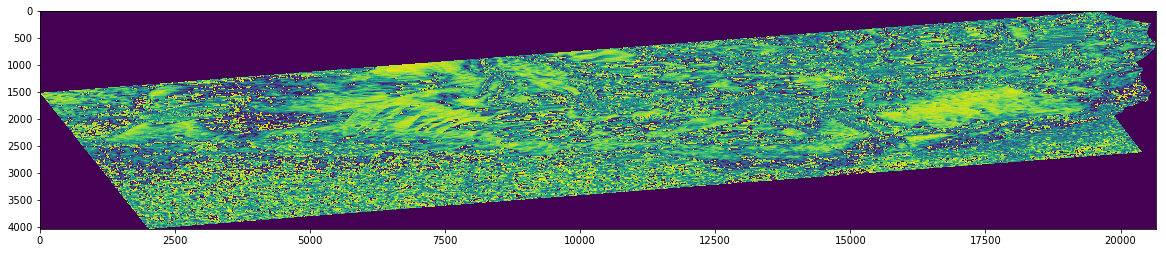

In [22]:
# for 2 coherence sum

In [23]:
path = '/Users/eyu/Google Drive/DTU/11_semester/master_thesis/data/coherence'
count = 0
coherence_sum = np.zeros_like(coherence_1)
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        file_path = os.path.join(root, name)
        try:
            coherence_sum += load_tif_as_array(gdal.Open(file_path))
            count += 1
        except:
            print(file_path)
            pass

/Users/eyu/Google Drive/DTU/11_semester/master_thesis/data/coherence/Coher_20161111_20161117_5_1_2_2_ortho.tif
/Users/eyu/Google Drive/DTU/11_semester/master_thesis/data/coherence/Coher_20161111_20161117_5_1_4_4_ortho.tif


In [24]:
count

140

In [25]:
coherence_probability = coherence_sum/count

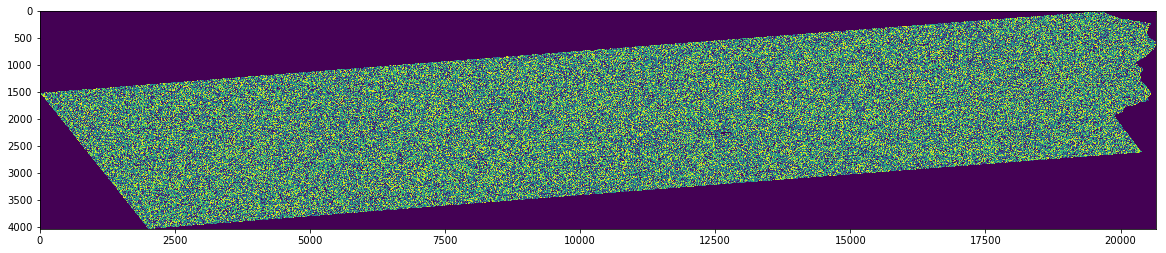

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(coherence_sum)

In [30]:
coherence_vector = coherence_1[coherence_1!=0].flatten()

In [31]:
coherence_vector.shape

(51528175,)

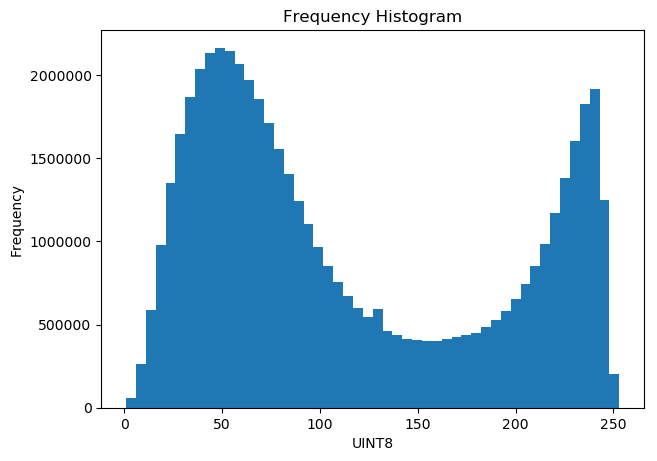

In [33]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(coherence_vector, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='UINT8');

In [12]:
coh_check = '/Users/eyu/Google Drive/DTU/11_semester/master_thesis/data/coherence/Coher_20171001_20171007_5_1_1_1_ortho.tif'
coherence_check = load_tif_as_array(gdal.Open(coh_check))

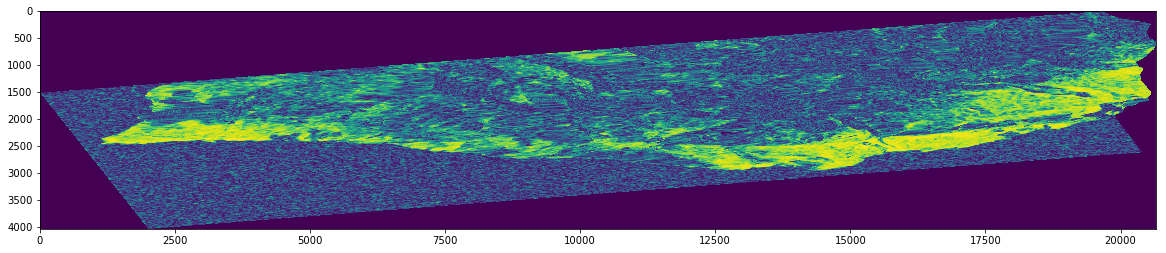

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(coherence_check)

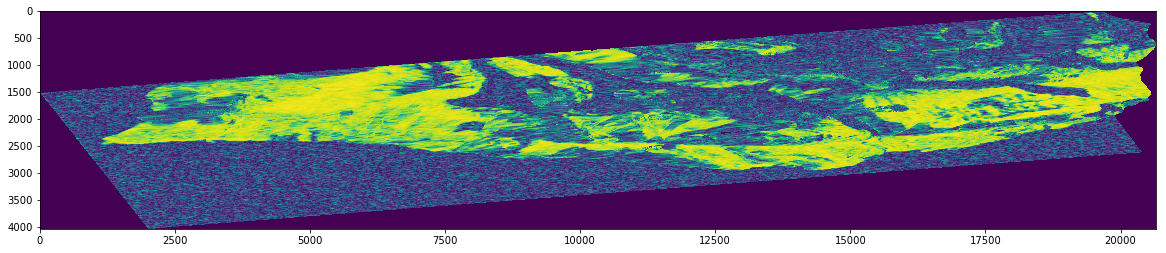

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(coherence_1)